In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-apr-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-apr-2021/train.csv
/kaggle/input/tabular-playground-series-apr-2021/test.csv


In [2]:
!pwd


/kaggle/working


In [23]:
train = pd.read_csv('../input/tabular-playground-series-apr-2021/train.csv')
test = pd.read_csv('../input/tabular-playground-series-apr-2021/train.csv')
sample_submission = pd.read_csv('../input/tabular-playground-series-apr-2021/sample_submission.csv')

In [4]:
import pandas_profiling
train.profile_report()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

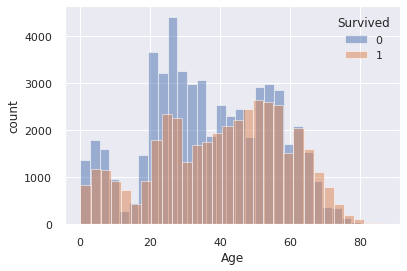

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=1)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

plt.hist(train.loc[train['Survived'] ==0, 'Age'].dropna(), bins=30, alpha = 0.5, label='0')
plt.hist(train.loc[train['Survived'] ==1, 'Age'].dropna(), bins=30, alpha = 0.5, label='1')
plt.xlabel('Age')
plt.ylabel('count')
plt.legend(title='Survived')

In [48]:
print('Oldest passanger : {:.1f} Years'.format(train['Age'].max()))
print('Youngest passenger : {:.1f} Years'.format(train['Age'].min()))
print('Mean age : {:.1f} Years'.format(train['Age'].mean()))

Oldest passanger : 87.0 Years
Youngest passenger : 0.1 Years
Mean age : 38.4 Years


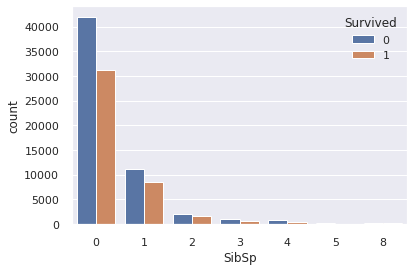

In [30]:
sns.countplot(x='SibSp', hue='Survived', data = train)
plt.legend(loc='upper right', title='Survived')

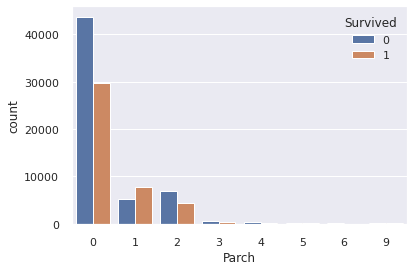

In [31]:
sns.countplot(x='Parch', hue='Survived', data = train)
plt.legend(loc='upper right', title='Survived')

(-5.0, 250.0)

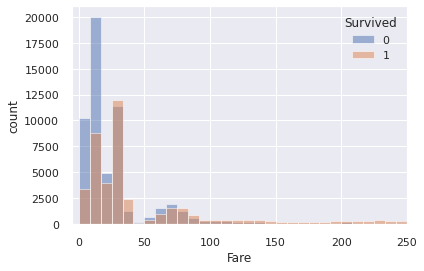

In [32]:
# The higher the fare, the higher the survival rate.
plt.hist(train.loc[train['Survived'] ==0, 'Fare'].dropna(), range=(0, 250), bins=30, alpha = 0.5, label='0')
plt.hist(train.loc[train['Survived'] ==1, 'Fare'].dropna(), range=(0, 250), bins=30, alpha = 0.5, label='1')
plt.xlabel('Fare')
plt.ylabel('count')
plt.legend(title='Survived')
plt.xlim(-5, 250)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

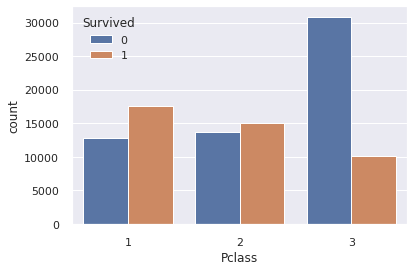

In [33]:
sns.countplot(x='Pclass', hue='Survived', data = train)

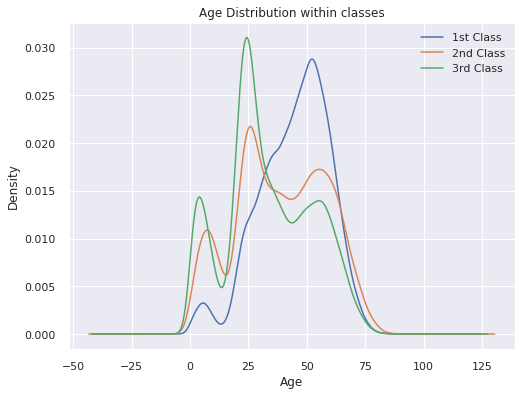

In [51]:
# Age distribution within Pclasses

plt.figure(figsize=(8, 6))
train['Age'][train['Pclass'] == 1].plot(kind='kde')
train['Age'][train['Pclass'] == 2].plot(kind='kde')
train['Age'][train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

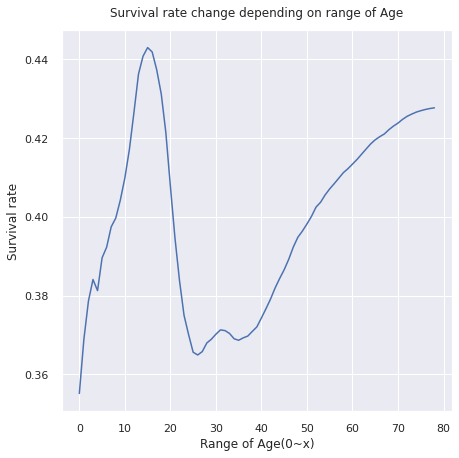

In [52]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(train[train['Age'] < i]['Survived'].sum() / len(train[train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7, 7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

<AxesSubplot:xlabel='Sex', ylabel='count'>

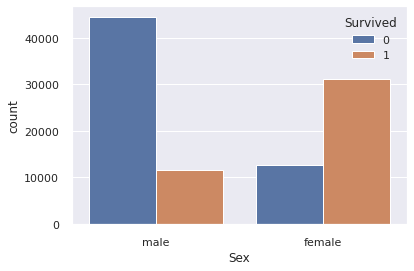

In [34]:
sns.countplot(x='Sex', hue='Survived', data = train)

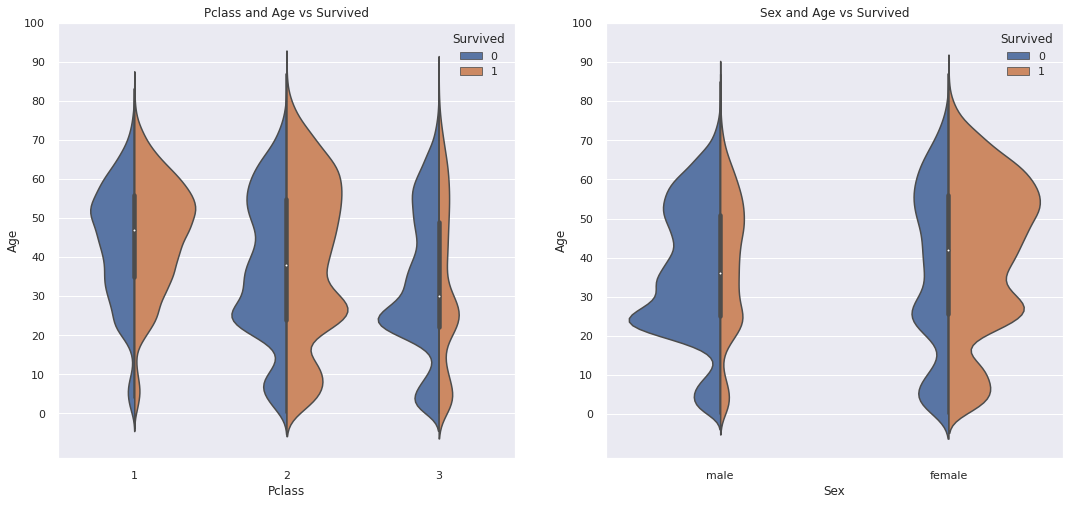

In [53]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

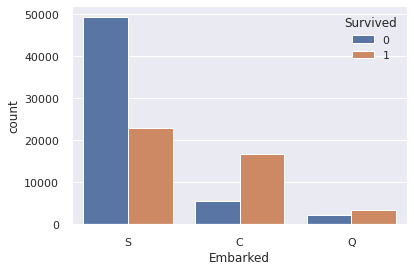

In [35]:
sns.countplot(x='Embarked', hue='Survived', data = train)

In [36]:
data = pd.concat([train, test], sort=False)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  200000 non-null  int64  
 1   Survived     200000 non-null  int64  
 2   Pclass       200000 non-null  int64  
 3   Name         200000 non-null  object 
 4   Sex          200000 non-null  object 
 5   Age          193416 non-null  float64
 6   SibSp        200000 non-null  int64  
 7   Parch        200000 non-null  int64  
 8   Ticket       190754 non-null  object 
 9   Fare         199732 non-null  float64
 10  Cabin        64268 non-null   object 
 11  Embarked     199500 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 19.8+ MB


### Check Null data

In [43]:
for col in data.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (data[col].isnull().sum() / data[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 3.29%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 4.62%
column:       Fare	 Percent of NaN value: 0.13%
column:      Cabin	 Percent of NaN value: 67.87%
column:   Embarked	 Percent of NaN value: 0.25%


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  200000 non-null  int64  
 1   Survived     200000 non-null  int64  
 2   Pclass       200000 non-null  int64  
 3   Name         200000 non-null  object 
 4   Sex          200000 non-null  object 
 5   Age          193416 non-null  float64
 6   SibSp        200000 non-null  int64  
 7   Parch        200000 non-null  int64  
 8   Ticket       190754 non-null  object 
 9   Fare         199732 non-null  float64
 10  Cabin        64268 non-null   object 
 11  Embarked     199500 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 19.8+ MB


In [ ]:
# male: 0, female: 1
data['Sex'].replace(['male', 'female'], [0,1], inplace=True)

In [ ]:
data.head()

In [ ]:
data.isnull().sum()

In [ ]:
#Embarked
data['Embarked'].value_counts() #data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [ ]:
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)

In [ ]:
age_avg = data['Age'].mean()
age_std = data['Age'].std()
data['Age'].fillna(np.random.randint(age_avg - age_std, age_avg + age_std), inplace=True)

In [ ]:
train = data[:len(train)]
test = data[len(train):]
y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
x_test = test.drop('Survived', axis=1)

In [ ]:
X_train.head()
X_train.info()

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2', solver = 'sag', random_state=0)


In [ ]:
clf.fit(X_train, y_train)